# Preparations

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing(use_latex="mathjax")
import pandas as pd
mpl.rcdefaults()
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from scipy import stats
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from dtuimldmtools import bmplot, feature_selector_lr, rlr_validate

C:\Users\DELL\AppData\Local\Temp\ipykernel_9032\1217883061.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# define data file name
data_file = "../project1_data/Rice_Cammeo_Osmancik.csv"

#load data
data = pd.read_csv(data_file)

# Check missing values
missing_values = data.isnull().values.any()
print(missing_values)

False


In [3]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


# Regression Part A

In [4]:
# use other features to predict the eccenctricity
# by predicting some parameters describing the rice grains' shape and size, we can get a deeper understanding of the rice grains' quality
# do 1-out-of-K encoding for the categorical feature "Class" to transform it into a numerical feature
data = pd.get_dummies(data, columns=["Class"], drop_first=True)
# transform True/False to 1/0 (categorical feature "Class_b'Osmancik")
data["Class_b'Osmancik"] = data["Class_b'Osmancik'"].astype(int)
data = data.drop(columns=["Class_b'Osmancik'"])
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class_b'Osmancik
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [5]:
# apply a feature transformation to your data matrix X such that each column has mean 0 and standard deviation 1, including categorical features
# get the known features
X = data.drop(columns=["Eccentricity"])
# record the means and vars
means = X.mean()
vars = X.std()
# apply the transformation
X = (X - X.mean()) / X.std()
# define the target variable
y = data["Eccentricity"]
# show results
print('means',means)
print('vars',vars)
X.head()

means Area                 12667.727559
Perimeter              454.239180
Major_Axis_Length      188.776222
Minor_Axis_Length       86.313750
Convex_Area          12952.496850
Extent                   0.661934
Class_b'Osmancik         0.572178
dtype: float64
vars Area                 1732.367706
Perimeter              35.597081
Major_Axis_Length      17.448679
Minor_Axis_Length       5.729817
Convex_Area          1776.972042
Extent                  0.077239
Class_b'Osmancik        0.494828
dtype: float64


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Extent,Class_b'Osmancik
0,1.479635,2.004091,2.348238,-0.212915,1.499463,-1.152770,-1.156318
1,1.147720,1.125705,0.988261,0.945444,1.192761,-0.602000,-1.156318
2,1.135020,1.317041,1.451718,0.253854,1.126356,0.405558,-1.156318
3,0.293398,0.115285,0.261405,0.198025,0.233826,-0.275315,-1.156318
4,1.166191,1.486858,1.316269,0.523351,1.299685,-0.205986,-1.156318


In [6]:
# do regularized validation
K_1a = 10
lambdas_1a = np.power(10.0, range(-15, 15)) # values of lambda
# transform pandas dataframe to numpy array
X_arr = X.values
# use the package offered by 02450 to compute
(
    opt_val_err,
    opt_lambda,
    mean_w_vs_lambda,
    train_err_vs_lambda,
    test_err_vs_lambda,
) = rlr_validate(X_arr, y, lambdas_1a, cvf=K_1a)
print(test_err_vs_lambda)

[0.75124435 0.75124435 0.75124435 0.75124435 0.75124435 0.75124435
 0.75124435 0.75124435 0.75124435 0.75124435 0.75124436 0.7512445
 0.75124584 0.75125958 0.75142081 0.75424241 0.77185624 0.78346313
 0.78650551 0.78727692 0.78747171 0.78749706 0.78749968 0.78749994
 0.78749997 0.78749997 0.78749997 0.78749997 0.78749997 0.78749997]


Text(0.5, 1.0, 'Generalization error vs. lamdba')

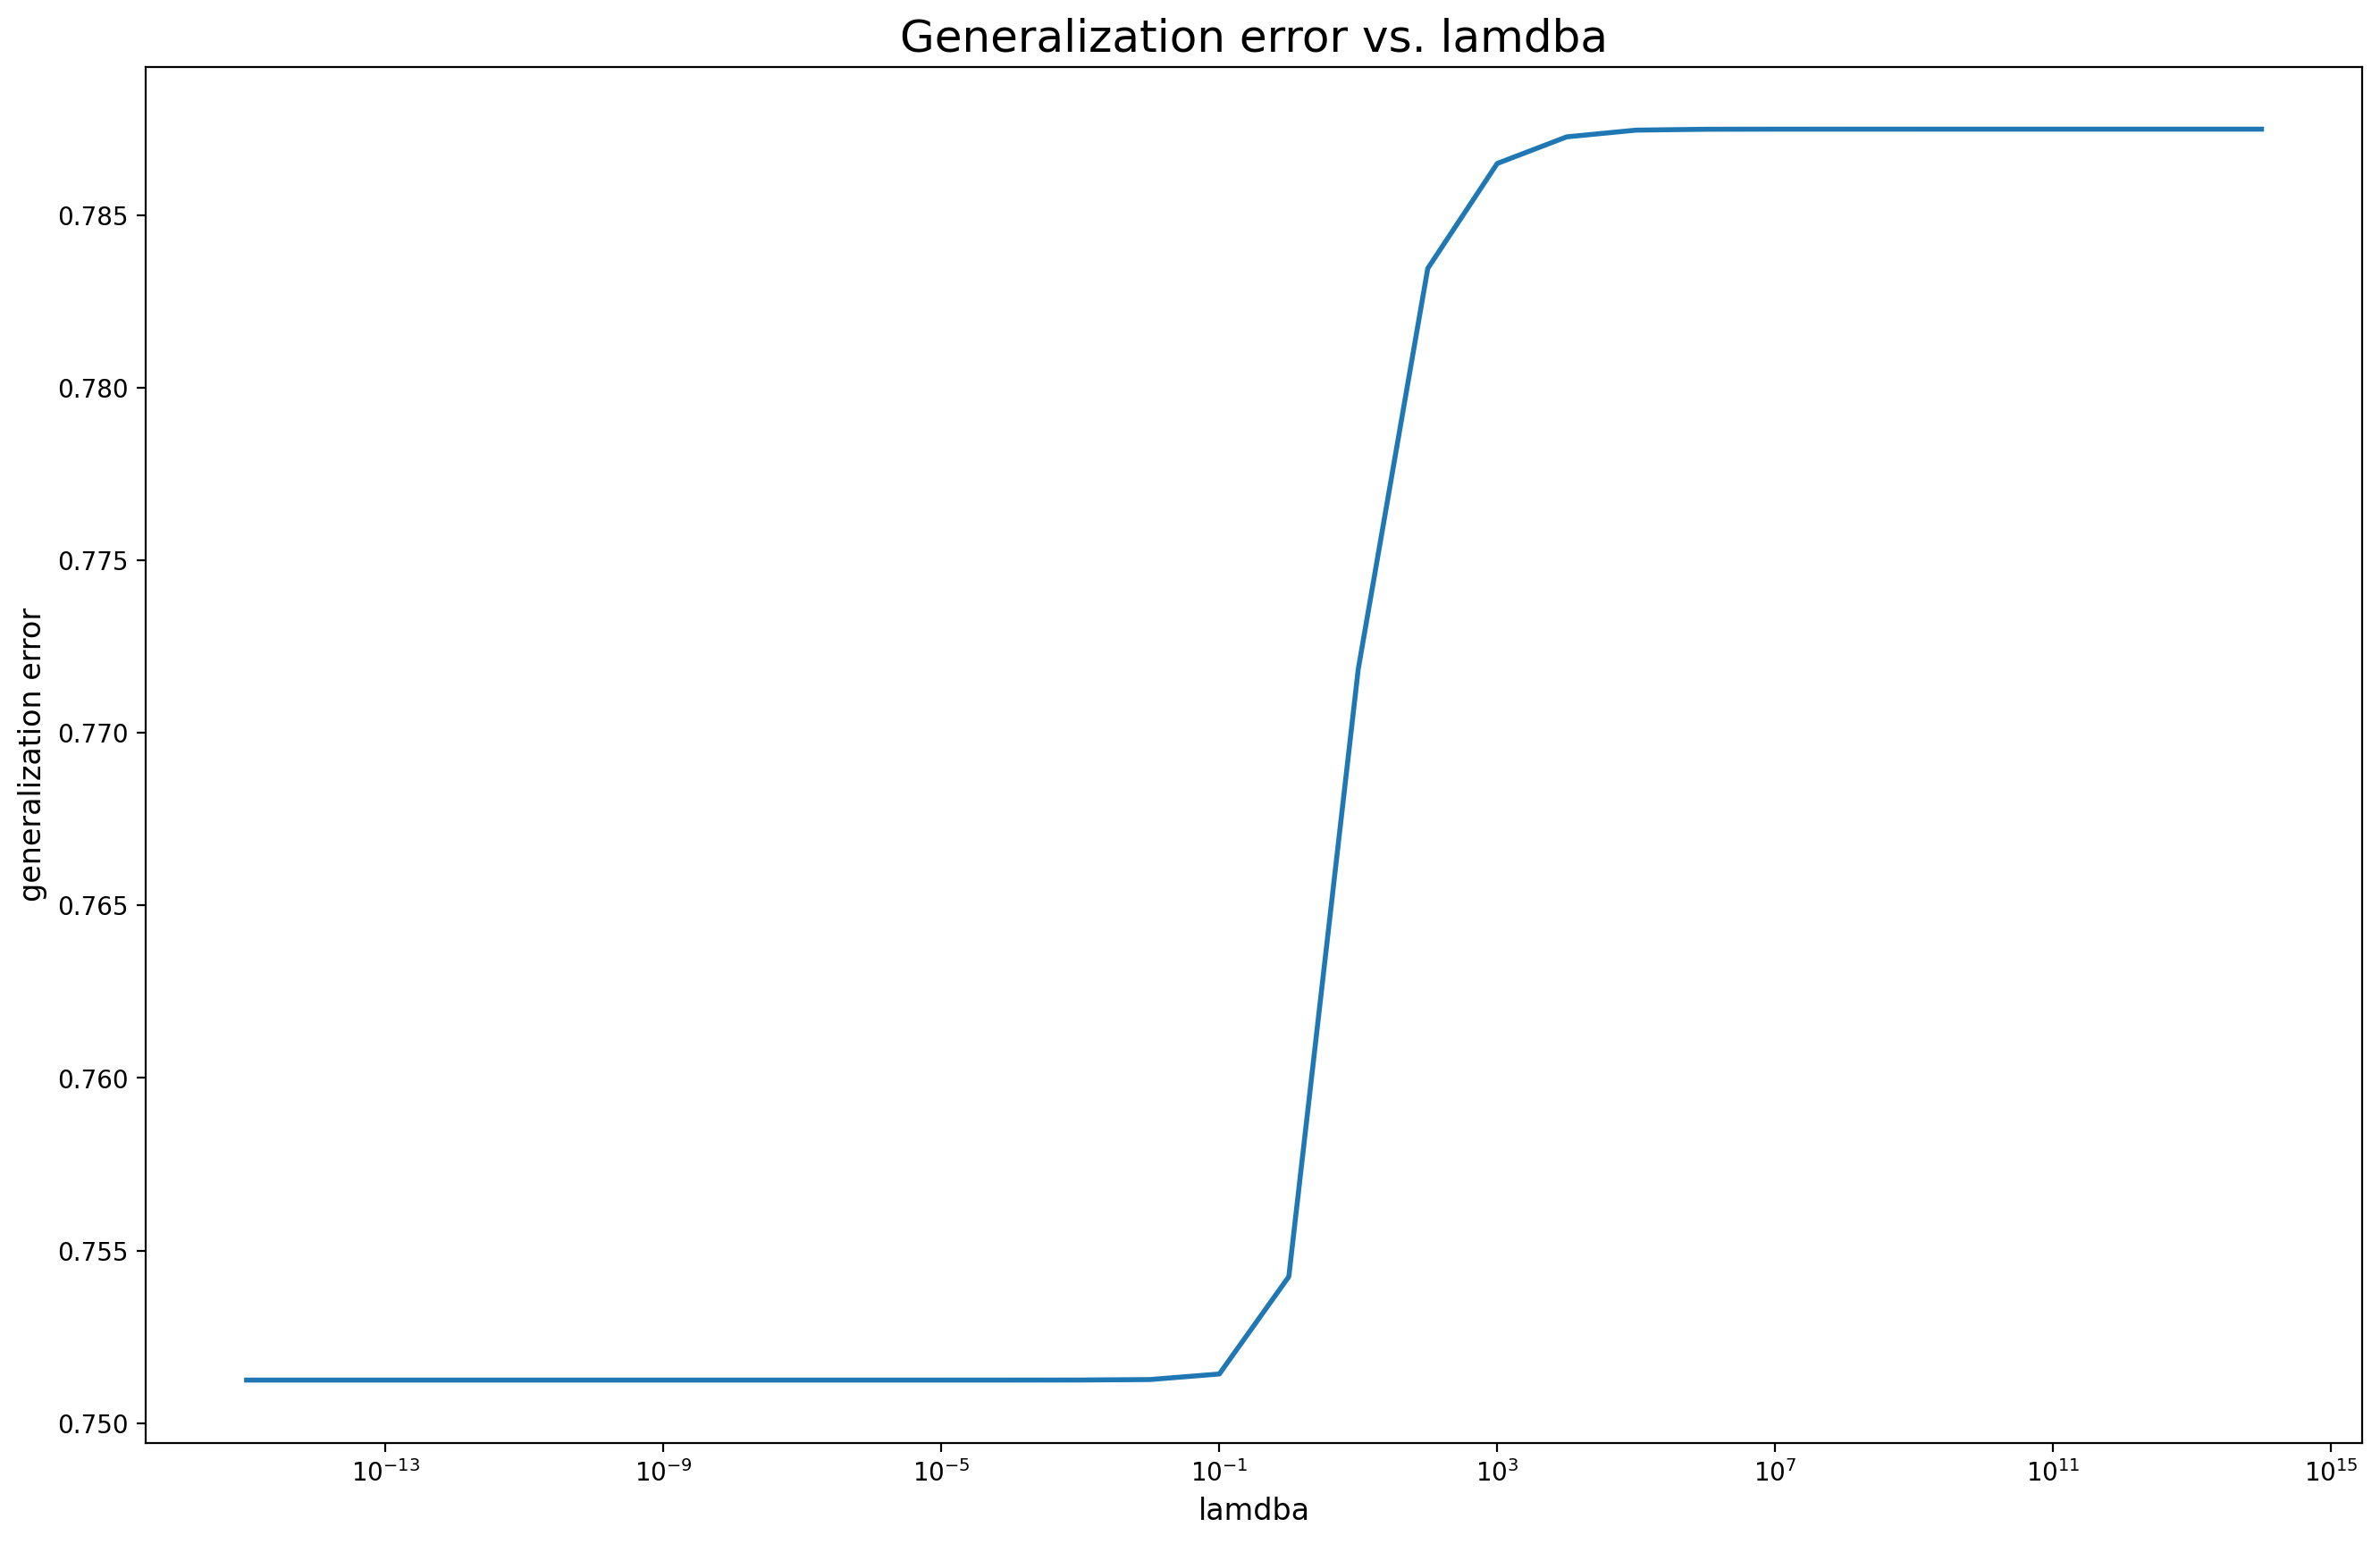

In [7]:
# plot figures
fig_1a, ax_1a = plt.subplots(figsize=(16,10))
ax_1a.semilogx(lambdas_1a, test_err_vs_lambda , linestyle= '-',linewidth=2,label='o')
ax_1a.set_xlabel('lamdba',fontsize=12)
ax_1a.set_ylabel('generalization error',fontsize=12)
ax_1a.set_title('Generalization error vs. lamdba',fontsize=18)
# save_path_1a = "../project2_figs/err_vs_lamdba.png"
# fig_1a.savefig(save_path_1a, dpi=400)
# 先降后升如何实现？？？

# Regression Part B

# Classification

## Task 1

The problem I have chosen to address is a binary classification task.  The 'Class' column within the dataset serves as the target variable, distinguishing between two distinct categories of rice, 'Cammeo' and 'Osmancik'. Consequently, each rice grain instance is categorized as either 'Cammeo' or 'Osmancik', establishing the binary nature of this classification challenge.

In [14]:
# Prepare the dataset
le = LabelEncoder()
data['Class_encoded'] = le.fit_transform(data['Class'])
X = data.drop(['Class', 'Class_encoded'], axis=1)
y = data['Class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 2

### Logistic Regression

In [15]:
# Preparation and definition of parameter grid for Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
param_grid = {'C': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]}

In [16]:
# Fit GridSearchCV to training data to find the best Logistic Regression model
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 0.06}
Best cross-validation score: 0.93


### KNN

In [17]:
# Preparation and definition of parameter grid for KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 15))}

In [18]:
# Fit GridSearchCV to training data to find the best KNN model
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'n_neighbors': 7}
Best cross-validation score: 0.88


For logistic regression, the complexity-controlling parameter λ, which is inversely related to the parameter 'C', is chosen as 50/3 (C=0.06). This value has been selected from a range: [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]. This implies that we expect some regularization to prevent overfitting while retaining the model's capacity to capture the underlying patterns in the data.

For the KNN algorithm, the complexity is controlled by the number of neighbors, k, which has been selected as 7. This parameter was chosen from a smaller, more targeted range: [1, 15]. A k value of 7 strikes a balance, aiming to ensure that the model generalizes well to new data without being overly complex or too simplistic.

## Task 3

In [19]:
# Setup for cross-validation
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_results = []

In [20]:
# Define the baseline error rate function
def baseline_error_rate(y_true, y_pred):
    return np.sum(y_pred != y_true) / len(y_true)

# Conduct cross-validation with grid search for Logistic Regression and KNN
for i, (train_index, test_index) in enumerate(outer_cv.split(X, y), start=1):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression with Grid Search
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    param_grid_log_reg = {'C': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]}
    grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
    grid_search_log_reg.fit(X_train, y_train)
    
    # KNN with Grid Search
    knn = KNeighborsClassifier()
    param_grid_knn = {'n_neighbors': list(range(1, 15))}
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
    grid_search_knn.fit(X_train, y_train)
    
    # Evaluate models
    best_log_reg = grid_search_log_reg.best_estimator_
    best_log_reg.fit(X_train, y_train)
    y_pred_log_reg = best_log_reg.predict(X_test)
    
    best_knn = grid_search_knn.best_estimator_
    best_knn.fit(X_train, y_train)
    y_pred_knn = best_knn.predict(X_test)
    
    baseline_pred = np.full_like(y_test, y_train.value_counts().idxmax())
    
    # Calculate error rates
    error_rate_log_reg = baseline_error_rate(y_test, y_pred_log_reg)
    error_rate_knn = baseline_error_rate(y_test, y_pred_knn)
    error_rate_baseline = baseline_error_rate(y_test, baseline_pred)
    
    # Append results
    outer_results.append({
        'Outer fold': i,
        'Method 2': grid_search_knn.best_params_['n_neighbors'],
        'Etest_Method2': error_rate_knn * 100,
        'Logistic regression': grid_search_log_reg.best_params_['C'],
        'Etest_LogReg': error_rate_log_reg * 100,
        'Etest_Baseline': error_rate_baseline * 100
    })

results_df = pd.DataFrame(outer_results)
print(results_df)

   Outer fold  Method 2  Etest_Method2  Logistic regression  Etest_LogReg  \
0           1         3      11.286089                 0.04      6.561680   
1           2         3       8.923885                 0.04      7.349081   
2           3         3       9.448819                 0.06      6.561680   
3           4         3      11.023622                 0.04      6.561680   
4           5         3      12.073491                 0.10      8.661417   
5           6         3      12.335958                 0.08      6.824147   
6           7         3      11.023622                 0.10      7.086614   
7           8         3      12.335958                 0.12      7.611549   
8           9         3      11.811024                 0.12      7.874016   
9          10         3      12.860892                 0.18      4.986877   

   Etest_Baseline  
0       42.782152  
1       42.782152  
2       42.782152  
3       42.782152  
4       42.782152  
5       42.782152  
6       42.7

## Task 4

In [21]:
# Perform statistical analysis
t_statistic_lr_vs_knn, p_value_lr_vs_knn = stats.ttest_rel(results_df['Etest_LogReg'], results_df['Etest_Method2'])
t_statistic_lr_vs_baseline, p_value_lr_vs_baseline = stats.ttest_rel(results_df['Etest_LogReg'], results_df['Etest_Baseline'])
t_statistic_knn_vs_baseline, p_value_knn_vs_baseline = stats.ttest_rel(results_df['Etest_Method2'], results_df['Etest_Baseline'])

In [22]:
# Calculate confidence intervals
confidence_interval_lr_vs_knn = stats.t.interval(0.95, len(results_df['Etest_LogReg'])-1, loc=np.mean(results_df['Etest_LogReg']-results_df['Etest_Method2']), scale=stats.sem(results_df['Etest_LogReg']-results_df['Etest_Method2']))
confidence_interval_lr_vs_baseline = stats.t.interval(0.95, len(results_df['Etest_LogReg'])-1, loc=np.mean(results_df['Etest_LogReg']-results_df['Etest_Baseline']), scale=stats.sem(results_df['Etest_LogReg']-results_df['Etest_Baseline']))
confidence_interval_knn_vs_baseline = stats.t.interval(0.95, len(results_df['Etest_Method2'])-1, loc=np.mean(results_df['Etest_Method2']-results_df['Etest_Baseline']), scale=stats.sem(results_df['Etest_Method2']-results_df['Etest_Baseline']))

In [23]:
# Print statistical analysis results
print(f"LR vs. KNN: p-value = {p_value_lr_vs_knn}, CI = {confidence_interval_lr_vs_knn}")
print(f"LR vs. Baseline: p-value = {p_value_lr_vs_baseline}, CI = {confidence_interval_lr_vs_baseline}")
print(f"KNN vs. Baseline: p-value = {p_value_knn_vs_baseline}, CI = {confidence_interval_knn_vs_baseline}")

LR vs. KNN: p-value = 1.9069615482306397e-05, CI = (-5.499180825091497, -3.1097430594229385)
LR vs. Baseline: p-value = 1.4266885777241929e-15, CI = (-36.47708199255887, -35.071474437887325)
KNN vs. Baseline: p-value = 4.759574858916058e-14, CI = (-32.38301305924021, -30.556619486691545)


### Is one model better than the other?

The p-value is approximately 0.0000197, which is approximatel less than 0.05, indicating a statistically significant improvement of the logistic regression model over the KNN. The confidence interval for the difference is also far from including 0, confirming the improvement.

### Are the two models better than the baseline?

LR vs. Baseline: The p-value is approximately 1.43e-15, which is much less than 0.05, indicating a statistically significant improvement of the logistic regression model over the baseline. The confidence interval for the difference is also far from including 0, confirming the improvement.

KNN vs. Baseline: The p-value is approximately 4.76e-14, which is much less than 0.05, indicating a statistically significant improvement of the KNN model over the baseline. The confidence interval for the difference is also far from including 0, confirming the improvement.

### Are some of the models identical?

Given the significant p-values when comparing both models to the baseline and each other, we can conclude that none of the models are identical in performance.

### What recommendations would you make based on what you’ve learned?

Selection of Model: The statistical evidence suggests that both the logistic regression and KNN models are significantly better than the baseline model, with one of them also being significantly better than the other. The specific choice between logistic regression and KNN should be based on which model had the lower error rate in the pairwise comparison, which the confidence interval suggests is the logistic regression model.

Model Deployment: Given the results, I would recommend deploying the logistic regression model for this particular dataset, as it not only outperforms the baseline but also the KNN model.

Further Analysis: Despite the statistical significance, the practical significance should also be evaluated. If the performance improvement is marginal, it may not justify the costs of changing models.

## Task 5

In [24]:
# Train the logistic regression model using the best value of λ
for i, (train_index, test_index) in enumerate(outer_cv.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    param_grid_log_reg = {'C': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18]}
    grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
    grid_search_log_reg.fit(X_train, y_train)
    
    best_log_reg = grid_search_log_reg.best_estimator_
    y_pred_log_reg = best_log_reg.predict(X_test)
    
    error_rate_log_reg = baseline_error_rate(y_test, y_pred_log_reg)
    
    outer_results.append({
        'Outer fold': i,
        'Logistic regression C': grid_search_log_reg.best_params_['C'],
        'Etest_LogReg': error_rate_log_reg * 100,
    })

# Examining feature importance for Logistic Regression
feature_importance = pd.DataFrame(data={'Feature': X.columns, 'Importance': best_log_reg.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))

             Feature  Importance
3  Minor_Axis_Length    0.376948
1          Perimeter    0.138839
0               Area    0.007600
6             Extent    0.003147
4       Eccentricity    0.001394
5        Convex_Area   -0.011414
2  Major_Axis_Length   -0.230331


### How Logistic Regression Makes Predictions?

It uses the sigmoid function to squeeze the output of a linear equation between 0 and 1. The model coefficients indicate the relationship between each feature and the log odds of the dependent variable, allowing the prediction of probabilities that are then mapped to class labels based on a threshold (commonly 0.5).

### Are the same features deemed relevant as for the regression part of the report?